# Análisis de Y.Afisha

En este proyecto optimizaremos las  los gastos de marketing. Importaremos las librerias necesarias y todos los datasets que registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018, esto nos ayudará a la visualizacion de los tipos de datos en cada dataset.

In [115]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [116]:
visit_data = pd.read_csv('/datasets/visits_log_us.csv')
orders_data = pd.read_csv('/datasets/orders_log_us.csv')
costs_data = pd.read_csv('/datasets/costs_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la importación de librerías y carga de datos
</div>

In [117]:
print(visit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [118]:
print(orders_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [119]:
print(costs_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


### Optimizando los datos para el análisis

Trabajaremos con grandes volúmenes de datos en el proyecto, para tener cuidado con el manejo de los cálculos y no provoquen errores en el sistema de la plataforma en línea optimizaremos los datos para un mejor análisis.

In [120]:
# Cambiando el tipo de datos 'object' a 'category', analizamos las columnas para ganar espacio
visit_data['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [121]:
visit_data['Device'] = visit_data['Device'].astype('category')
visit_data.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [122]:
visit_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [123]:
# Conversión de columnas de fecha y hora a tipo datetime
visit_data['Start Ts'] = pd.to_datetime(visit_data['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visit_data['End Ts'] = pd.to_datetime(visit_data['End Ts'], format="%Y-%m-%d %H:%M:%S")
orders_data['Buy Ts'] = pd.to_datetime(orders_data['Buy Ts'], format="%Y-%m-%d %H:%M:%S")
costs_data['dt'] = pd.to_datetime(costs_data['dt'], format="%Y-%m-%d %H:%M:%S")

In [124]:
visit_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [125]:
orders_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [126]:
costs_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Informes y cálculo de métricas

Identificaremos el público objetivo de cómo los clientes usan el servicio; cuándo empiezan a comprar;
cuánto dinero aporta cada cliente a la compañía; cuándo los ingresos cubren el costo de adquisición de los clientes. Esto también nos ayudará acómo encontrar anomalías en los datos.

In [127]:
# 1. Visitas:

# Agregamos columnas adicionales para 'day', 'week' y 'month'
visit_data['date'] = visit_data['Start Ts'].dt.date
visit_data['week'] = visit_data['Start Ts'].dt.week
visit_data['month'] = visit_data['Start Ts'].dt.month

visit_data.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12


In [128]:
# Análisis de cuantas personas lo usan cada día, semana y mes?
daily_users = visit_data.groupby('date')['Uid'].nunique()
weekly_users = visit_data.groupby('week')['Uid'].nunique()
monthly_users = visit_data.groupby('month')['Uid'].nunique()
print(daily_users.head())
print(weekly_users.head())
print(monthly_users.head())

date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64
week
1    6918
2    6703
3    6972
4    7060
5    8111
Name: Uid, dtype: int64
month
1    28716
2    28749
3    27473
4    21008
5    20701
Name: Uid, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste!
</div>

In [129]:
# Cálculo de los primedios de cada resultado para cadá métrica por día, semana y mes
avg_daily_users = daily_users.mean()
avg_weekly_users = weekly_users.mean()
avg_monthly_users = monthly_users.mean()
print(f'Promedio de usuarios únicos diarios: {avg_daily_users:.2f}')
print(f'Promedio de usuarios únicos semanales: {avg_weekly_users:.2f}')
print(f'Promedio de usuarios únicos mensuales: {avg_monthly_users:.2f}')

Promedio de usuarios únicos diarios: 907.99
Promedio de usuarios únicos semanales: 5825.29
Promedio de usuarios únicos mensuales: 23228.42


In [130]:
# Cuantas sesiones hay por día?

daily_sesions = visit_data.groupby('date')['Uid'].count()

print(daily_sesions.head())

date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64


In [131]:
# Cuál es la duración de cada sesión (en segundos)?
visit_data['session_duration'] = (visit_data['End Ts'] - visit_data['Start Ts']).dt.seconds

print(visit_data[['Uid', 'Start Ts', 'End Ts', 'session_duration']].head())

                    Uid            Start Ts              End Ts  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   

   session_duration  
0              1080  
1              1680  
2                 0  
3              1440  
4                 0  


In [132]:
print(visit_data['session_duration'].mean())

643.506488592098


<AxesSubplot:>

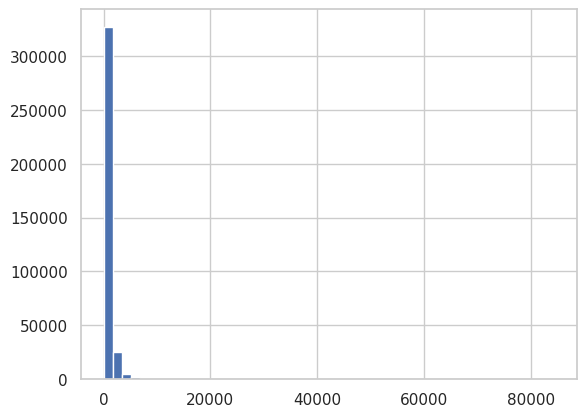

In [133]:
visit_data['session_duration'].hist(bins=50)

In [134]:
visit_data["date"] = pd.to_datetime(visit_data.date)

# Frecuencia de retorno de usuarios y usuarias
visit_data = visit_data.sort_values(by=['Uid', 'Start Ts'])
visit_data["days_since_last_visit"] = visit_data.groupby('Uid')['Start Ts'].diff().dt.days

(visit_data.dropna(subset=["days_since_last_visit"])
     .groupby('Uid')["days_since_last_visit"].mean()
     .rename("average_days_between_visits")
     .reset_index()
)

,Uid,average_days_between_visits
0,313578113262317,86.500000
1,325320750514679,148.000000
2,526778907996220,55.666667
3,577434573913691,6.000000
4,1260655184775459,43.000000
...,...,...
52123,18445884613277162497,25.000000
52124,18446104389491815722,0.000000
52125,18446156210226471712,17.833333
52126,18446167067214817906,0.000000


In [135]:
# Frecuencia de retorno de usuarios y usuarias
visit_data = visit_data.sort_values(by=['Uid', 'Start Ts'])
visit_data['previous_visit'] = visit_data.groupby('Uid')['Start Ts'].shift(1)
visit_data['days_since_last_visit'] = (visit_data['Start Ts'] - visit_data['previous_visit']).dt.days

return_frequency = visit_data.groupby('Uid')['days_since_last_visit'].mean().dropna()
print(return_frequency)

Uid
313578113262317          86.500000
325320750514679         148.000000
526778907996220          55.666667
577434573913691           6.000000
1260655184775459         43.000000
                           ...    
18445884613277162497     25.000000
18446104389491815722      0.000000
18446156210226471712     17.833333
18446167067214817906      0.000000
18446621818809592527    144.000000
Name: days_since_last_visit, Length: 52128, dtype: float64


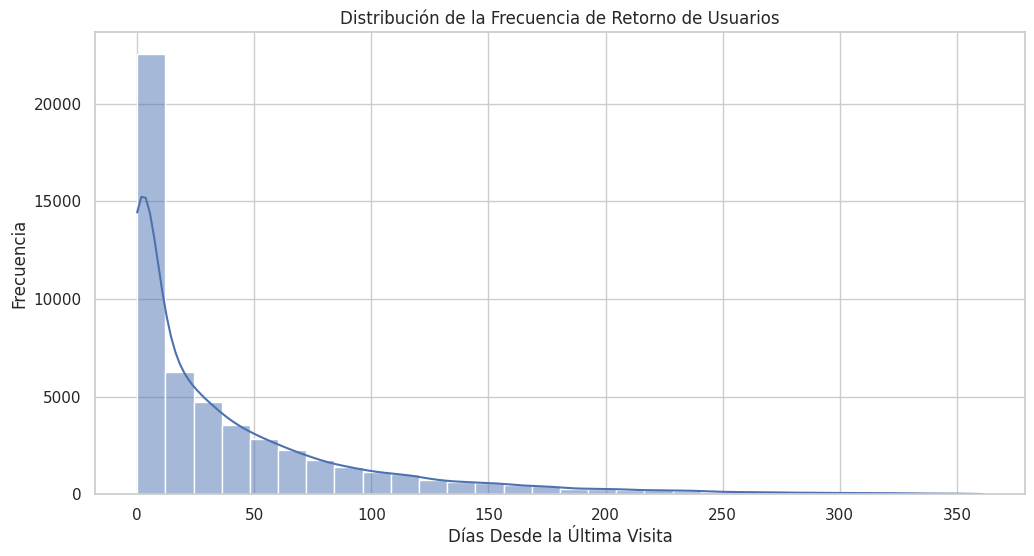

In [136]:
plt.figure(figsize=(12, 6))
sns.histplot(return_frequency, bins=30, kde=True)
plt.title('Distribución de la Frecuencia de Retorno de Usuarios')
plt.xlabel('Días Desde la Última Visita')
plt.ylabel('Frecuencia')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste!
</div>

In [137]:
# 2. Ventas

#Convertimos las columnas de fechas al tipo 'datetime64[M]'
visit_data['Start Ts'] = visit_data['Start Ts'].astype('datetime64[M]')
orders_data['Buy Ts'] = orders_data['Buy Ts'].astype('datetime64[M]')

In [138]:
# Creación de embudo, unimos visit_data con orders_data
merged_data = pd.merge(visit_data, orders_data, how='left', on='Uid', suffixes=('_visit', '_order'))

In [139]:
# Encontramos la 1ra visita y compra para cada usuario
first_visits = merged_data.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts': 'first_visit'})
first_purchases = merged_data.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_purchase'})
print(first_visits.head())
print(first_purchases.head())

               Uid first_visit
0   11863502262781  2018-03-01
1   49537067089222  2018-02-01
2  297729379853735  2017-06-01
3  313578113262317  2017-09-01
4  325320750514679  2017-09-01
               Uid first_purchase
0   11863502262781            NaT
1   49537067089222            NaT
2  297729379853735            NaT
3  313578113262317     2018-01-01
4  325320750514679            NaT


In [140]:
# Uno las 1ras visitas y compras en un solo DataFrame
conversion_data = pd.merge(first_visits, first_purchases, how='inner', on='Uid').dropna(subset=["first_purchase"])
print(conversion_data.head())

                 Uid first_visit first_purchase
3    313578113262317  2017-09-01     2018-01-01
22  1575281904278712  2017-06-01     2017-06-01
35  2429014661409475  2017-10-01     2017-10-01
36  2464366381792757  2018-01-01     2018-01-01
38  2551852515556206  2017-11-01     2017-11-01


In [141]:
# Cálculo del tiempo y conversión en meses, creamos la columna 'conversion_time_months'
conversion_data['conversion_time_months'] = conversion_data.apply(
lambda row: relativedelta(row['first_purchase'], row['first_visit']).months + 12 * (relativedelta(row['first_purchase'], row['first_visit']).years), axis=1
)

In [142]:
# Creamos cohorts en base al mes de la 1ra visita.
conversion_data['cohort'] = conversion_data['first_visit'].astype('datetime64[M]')

# Creación de un pivot_table para mostrar la proporción de usuarios que compran en periodos distintos a partir del registro
conversion_pivot = conversion_data.pivot_table(index='cohort', 
                                               columns='conversion_time_months', 
                                               values='Uid', 
                                               aggfunc='nunique', 
                                               fill_value=0)

In [143]:
# Guardamos el resultado en una variable
conversion_counts = conversion_data.groupby(['cohort', 'conversion_time_months']).size().unstack(fill_value=0)
conversion_counts

conversion_time_months,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,2023,170,67,107,119,92,78,59,64,64,26,54
2017-07-01,1753,95,99,100,89,77,67,62,50,33,33,0
2017-08-01,1208,118,92,73,65,38,39,38,25,25,0,0
2017-09-01,2257,268,143,102,59,76,71,40,42,0,0,0
2017-10-01,3761,327,178,114,97,92,49,60,0,0,0,0
2017-11-01,3357,392,155,102,127,64,65,0,0,0,0,0
2017-12-01,3491,237,115,112,45,74,0,0,0,0,0,0
2018-01-01,2644,244,114,50,67,0,0,0,0,0,0,0
2018-02-01,2852,202,62,70,0,0,0,0,0,0,0,0


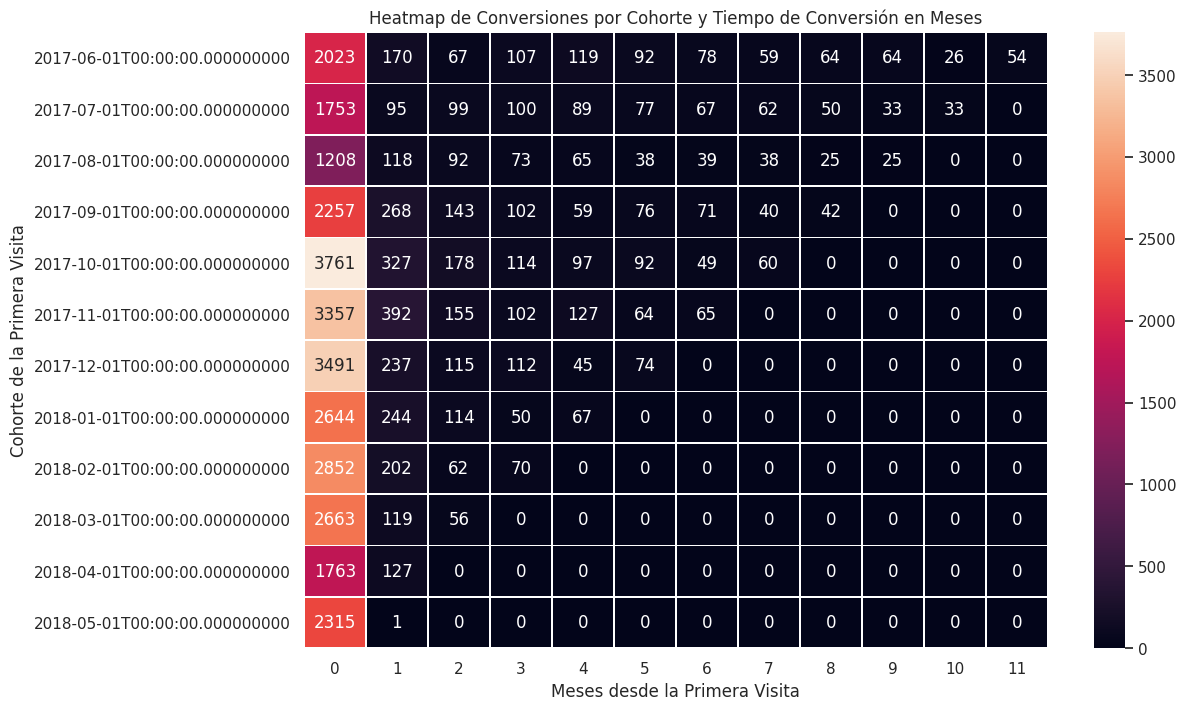

In [144]:
# Creamos el heatmap mostrando las cantidades proporcionalmente en cada punto
plt.figure(figsize=(12, 8))
sns.heatmap(conversion_counts, annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap de Conversiones por Cohorte y Tiempo de Conversión en Meses')
plt.xlabel('Meses desde la Primera Visita')
plt.ylabel('Cohorte de la Primera Visita')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste!
</div>

In [145]:
# Renombrando las columnas del pivot_table
conversion_pivot.columns = [f'Conversion {int(day)}d' for day in conversion_pivot.columns]
print(conversion_pivot.head())

            Conversion 0d  Conversion 1d  Conversion 2d  Conversion 3d  \
cohort                                                                   
2017-06-01           2023            170             67            107   
2017-07-01           1753             95             99            100   
2017-08-01           1208            118             92             73   
2017-09-01           2257            268            143            102   
2017-10-01           3761            327            178            114   

            Conversion 4d  Conversion 5d  Conversion 6d  Conversion 7d  \
cohort                                                                   
2017-06-01            119             92             78             59   
2017-07-01             89             77             67             62   
2017-08-01             65             38             39             38   
2017-09-01             59             76             71             40   
2017-10-01             97            

In [146]:
# Cálculo de la proporción de usuarios
conversion_proportions = conversion_pivot.div(conversion_pivot.sum(axis=1), axis=0)
print(conversion_proportions.head())

            Conversion 0d  Conversion 1d  Conversion 2d  Conversion 3d  \
cohort                                                                   
2017-06-01       0.692097       0.058159       0.022922       0.036606   
2017-07-01       0.713181       0.038649       0.040277       0.040683   
2017-08-01       0.701917       0.068565       0.053457       0.042417   
2017-09-01       0.738064       0.087639       0.046763       0.033355   
2017-10-01       0.803976       0.069902       0.038050       0.024369   

            Conversion 4d  Conversion 5d  Conversion 6d  Conversion 7d  \
cohort                                                                   
2017-06-01       0.040712       0.031475       0.026685       0.020185   
2017-07-01       0.036208       0.031326       0.027258       0.025224   
2017-08-01       0.037769       0.022080       0.022661       0.022080   
2017-09-01       0.019294       0.024853       0.023218       0.013080   
2017-10-01       0.020735       0.019

¿Cuántos pedidos hacen durante un período de tiempo dado?

In [147]:
# Número de pedidos por cohorte, creamos la columna 'order_month'
orders_data['order_month'] = orders_data['Buy Ts'].astype('datetime64[M]')
orders_data = orders_data.merge(first_visits, on='Uid')

orders_by_cohort = orders_data.groupby(['first_visit', 'order_month']).agg({'Revenue': 'sum', 'Uid': 'nunique'}).rename(columns={'Revenue': 'total_revenue', 'Uid': 'num_orders'})
print(orders_by_cohort)

                         total_revenue  num_orders
first_visit order_month                           
2017-06-01  2017-06-01         9557.49        2023
            2017-07-01         2664.58         231
            2017-08-01         1464.69         129
            2017-09-01         3882.09         188
            2017-10-01         3940.59         257
...                                ...         ...
2018-03-01  2018-05-01          774.77          90
2018-04-01  2018-04-01         8043.82        1763
            2018-05-01         1838.73         174
2018-05-01  2018-05-01        10368.11        2315
            2018-06-01            3.42           1

[79 rows x 2 columns]


¿Cuál es el tamaño promedio de compra?

In [148]:
# Calculamos el tamaño promedio de compra por cohorte y mes
mean_purchase_size = orders_by_cohort['total_revenue'] / orders_by_cohort['num_orders']
orders_by_cohort['mean_purchase_size'] = mean_purchase_size
print(orders_by_cohort)

                         total_revenue  num_orders  mean_purchase_size
first_visit order_month                                               
2017-06-01  2017-06-01         9557.49        2023            4.724414
            2017-07-01         2664.58         231           11.534978
            2017-08-01         1464.69         129           11.354186
            2017-09-01         3882.09         188           20.649415
            2017-10-01         3940.59         257           15.333035
...                                ...         ...                 ...
2018-03-01  2018-05-01          774.77          90            8.608556
2018-04-01  2018-04-01         8043.82        1763            4.562575
            2018-05-01         1838.73         174           10.567414
2018-05-01  2018-05-01        10368.11        2315            4.478665
            2018-06-01            3.42           1            3.420000

[79 rows x 3 columns]


In [149]:
# Creamos un pivot_table para mostrar el tamaño promedio de compra por cada mes y cohorte
mean_purchases_pivot = orders_by_cohort.pivot_table(
                index= 'first_visit',
                columns= 'order_month',
                values= 'mean_purchase_size',
                aggfunc= 'mean',
                fill_value=0
)

print(mean_purchases_pivot.head())

order_month  2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
first_visit                                                               
2017-06-01     4.724414   11.534978   11.354186   20.649415   15.333035   
2017-07-01     0.000000    5.633137    7.846519    7.442282    6.382857   
2017-08-01     0.000000    0.000000    5.161267    6.393077    7.256159   
2017-09-01     0.000000    0.000000    0.000000    5.475055   10.138301   
2017-10-01     0.000000    0.000000    0.000000    0.000000    4.882297   

order_month  2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
first_visit                                                               
2017-06-01    13.913695   18.465344   14.650387   13.476221   22.318205   
2017-07-01     5.535882    6.000602    4.819672    6.017969    6.300174   
2017-08-01     8.087265    7.864466    7.011842    6.403289   14.491047   
2017-09-01     8.757801   58.645674   11.607928   13.643214    6.906000   
2017-10-01     8.003845 

Cálculo del LTV  

In [150]:
#Examinamos la distribución de las fechas de pedido
print(orders_data['Buy Ts'].describe())

count                   50415
unique                     13
top       2017-12-01 00:00:00
freq                     6218
first     2017-06-01 00:00:00
last      2018-06-01 00:00:00
Name: Buy Ts, dtype: object


In [151]:
# Buscamos la primera compra de cada usuario
first_purchases_user = orders_data.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_purchase'})

# Agregamos la columna con el mes de la primera compra
first_purchases_user['first_purchase_month'] = first_purchases_user['first_purchase'].astype('datetime64[M]')
print(first_purchases_user.head())

                Uid first_purchase first_purchase_month
0   313578113262317     2018-01-01           2018-01-01
1  1575281904278712     2017-06-01           2017-06-01
2  2429014661409475     2017-10-01           2017-10-01
3  2464366381792757     2018-01-01           2018-01-01
4  2551852515556206     2017-11-01           2017-11-01


In [152]:
# Cálculo del número de nuevos usuarios para cada mes
new_users = first_purchases_user.groupby('first_purchase_month').agg({'Uid': 'nunique'}).rename(columns={'Uid': 'n_buyers'})

In [153]:
#Añadimos el mes del primer pedido a la tabla de pedidos ('orders_data')
orders_data = orders_data.merge(first_purchases_user[['Uid', 'first_purchase_month']], on='Uid')
print(orders_data.head)

<bound method NDFrame.head of           Buy Ts  Revenue                   Uid order_month first_visit  \
0     2017-06-01    17.00  10329302124590727494  2017-06-01  2017-06-01   
1     2017-06-01     0.55  11627257723692907447  2017-06-01  2017-06-01   
2     2017-06-01     0.37  17903680561304213844  2017-06-01  2017-06-01   
3     2017-06-01     0.55  16109239769442553005  2017-06-01  2017-06-01   
4     2017-06-01     0.37  14200605875248379450  2017-06-01  2017-06-01   
...          ...      ...                   ...         ...         ...   
50410 2018-05-01     4.64  12296626599487328624  2018-05-01  2018-05-01   
50411 2018-05-01     5.80  11369640365507475976  2018-05-01  2018-05-01   
50412 2018-05-01     0.30   1786462140797698849  2018-05-01  2018-05-01   
50413 2018-05-01     3.67   3993697860786194247  2018-05-01  2017-10-01   
50414 2018-06-01     3.42     83872787173869366  2018-06-01  2018-05-01   

      first_purchase_month  
0               2017-06-01  
1          

In [154]:
# Creamos cohortes y agregamos los meses de la primera compra de de los usuarios a 'orders_data'
orders_data['cohort'] = orders_data['first_purchase_month']

# Añadimos el mes del pedido a la tabla orders_data
orders_data['order_month'] = orders_data['Buy Ts'].astype('datetime64[M]')

In [155]:
# Agrupamos la tabla y calculamos y calculamos el Beneficio Bruto (gross_profit)
margin_rate = 0.5

orders_data['gross_profit'] = orders_data['Revenue'] * margin_rate

In [156]:
# Agrupamos a tabla por cohortes y meses de pedido para obtener los ingresos
cohort_data = orders_data.groupby(['cohort', 'order_month']).agg({'gross_profit': 'sum'}).reset_index()

# Calculamos el número de meses desde la 1ra compra (Edad de cohorte)
def calculate_month_lifetime(row):
    return relativedelta(row['order_month'], row['cohort']).months + (relativedelta(row['order_month'], row['cohort']).years * 12)

cohort_data['month_lifetime'] = cohort_data.apply(calculate_month_lifetime, axis=1)

print(cohort_data.head())

      cohort order_month  gross_profit  month_lifetime
0 2017-06-01  2017-06-01      4778.745               0
1 2017-06-01  2017-07-01       490.910               1
2 2017-06-01  2017-08-01       442.670               2
3 2017-06-01  2017-09-01       965.650               3
4 2017-06-01  2017-10-01      1034.290               4


Cálculo de LTV

In [157]:
# Union de cohort_data con new_users para análisis de nuevos compradores
cohort_data = cohort_data.merge(new_users, left_on='cohort', right_index=True)

In [158]:
# Cálculo de LTV
cohort_data['LTV'] = cohort_data['gross_profit'] / cohort_data['n_buyers']
print(cohort_data.head())

      cohort order_month  gross_profit  month_lifetime  n_buyers       LTV
0 2017-06-01  2017-06-01      4778.745               0      2023  2.362207
1 2017-06-01  2017-07-01       490.910               1      2023  0.242664
2 2017-06-01  2017-08-01       442.670               2      2023  0.218819
3 2017-06-01  2017-09-01       965.650               3      2023  0.477336
4 2017-06-01  2017-10-01      1034.290               4      2023  0.511265


In [159]:
ltv_pivot = cohort_data.pivot_table(
            index='cohort',
            columns='month_lifetime',
            values='LTV',
            aggfunc='sum',
            fill_value=0
).round(2)

ltv_pivot

month_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.30,0.29,0.13
2017-07-01,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,0.00
2017-08-01,2.64,0.24,0.23,0.20,0.25,0.14,0.11,0.20,0.15,0.09,0.00,0.00
2017-09-01,2.82,0.56,0.26,1.99,0.20,0.32,0.35,0.12,0.09,0.00,0.00,0.00
2017-10-01,2.50,0.27,0.10,0.08,0.08,0.06,0.04,0.06,0.00,0.00,0.00,0.00
2017-11-01,2.58,0.20,0.10,0.16,0.07,0.03,0.06,0.00,0.00,0.00,0.00,0.00
2017-12-01,2.37,0.13,0.46,0.53,0.16,0.17,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,2.07,0.15,0.15,0.07,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,2.08,0.14,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


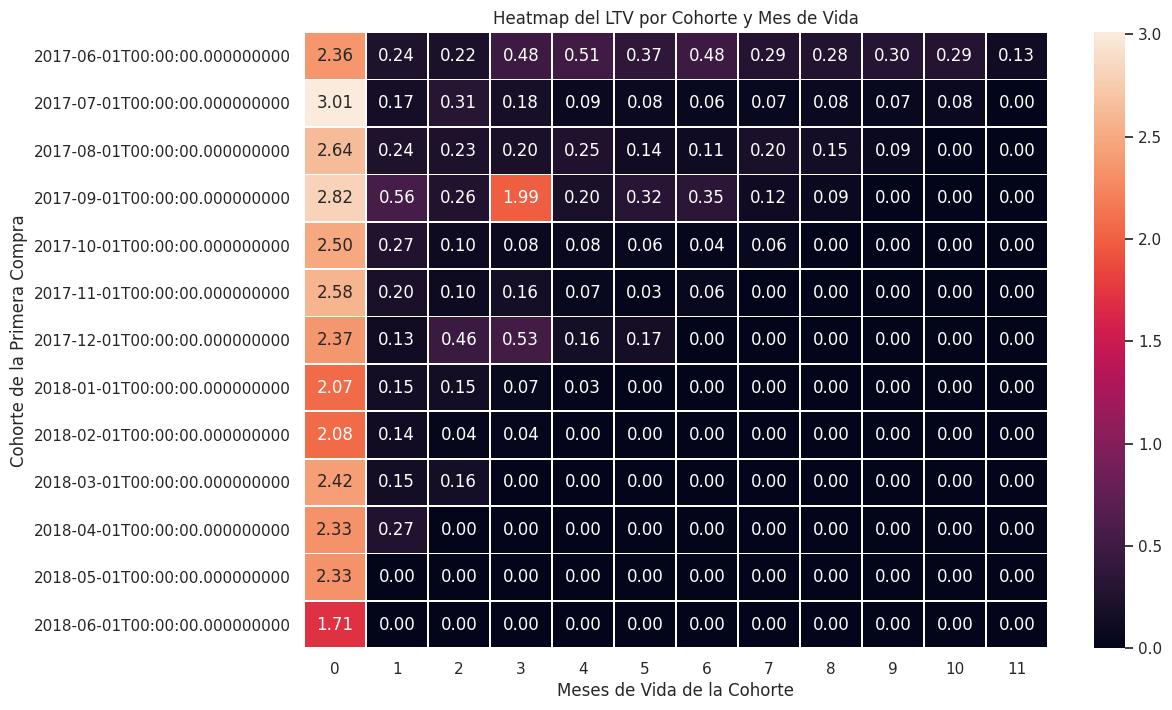

In [160]:
# Gráfico heatmap para el resultado de LTV
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_pivot, annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap del LTV por Cohorte y Mes de Vida')
plt.xlabel('Meses de Vida de la Cohorte')
plt.ylabel('Cohorte de la Primera Compra')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste!
</div>

###  Marketing

Analizaremos y calcularemos ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
¿Cuán rentables eran las inversiones? (ROMI)

In [161]:
# Total de dinero gastado
total_cost = costs_data['costs'].sum()

print(total_cost)

329131.62


In [162]:
# Dinero gastado por fuente de adquisición
cost_per_source = costs_data.groupby('source_id')['costs'].sum().reset_index().rename(columns={'costs': 'total_cost'})
print(cost_per_source)

   source_id  total_cost
0          1    20833.27
1          2    42806.04
2          3   141321.63
3          4    61073.60
4          5    51757.10
5          9     5517.49
6         10     5822.49


In [163]:
# Dinero gastado a lo largo del tiempo
cost_over_time = costs_data.groupby(costs_data['dt'].dt.to_period('M'))['costs'].sum().reset_index().rename(columns={'dt': 'month', 'costs': 'monthly_cost'})
print(cost_over_time)
print(cost_over_time.sum())

      month  monthly_cost
0   2017-06      18015.00
1   2017-07      18240.59
2   2017-08      14790.54
3   2017-09      24368.91
4   2017-10      36322.88
5   2017-11      37907.88
6   2017-12      38315.35
7   2018-01      33518.52
8   2018-02      32723.03
9   2018-03      30415.27
10  2018-04      22289.38
11  2018-05      22224.27
monthly_cost    329131.62
dtype: float64


Costo total: Se tiene un costo total de $329131.62, esto nos da una visión general de la inversión de marketing en un año.

Costo de adquisición de clientes de cada una de las fuentes (CAC)

In [164]:
# Agregamos source_id a los datos de orders_data
orders_data = orders_data.merge(visit_data[['Uid', 'Source Id']], on='Uid')

# Cálculo del núm de usuarios nuevos por fuente de adquisición
new_users_per_source = orders_data.groupby('Source Id')['Uid'].nunique().reset_index().rename(columns={'Uid': 'n_new_users'})

# Cálculo del costo total de marketing por fuente
cost_per_source = costs_data.groupby('source_id')['costs'].sum().reset_index().rename(columns={'costs': 'total_cost'})

# Cálculo del CAC: Creamos la columna 'CAC' = total_cost / n_new_users
cac_per_source = cost_per_source.merge(new_users_per_source, left_on='source_id', right_on='Source Id')
cac_per_source['CAC'] = cac_per_source['total_cost'] / cac_per_source['n_new_users']
print(cac_per_source)

   source_id  total_cost  Source Id  n_new_users        CAC
0          1    20833.27          1         7138   2.918642
1          2    42806.04          2         7305   5.859828
2          3   141321.63          3        13846  10.206676
3          4    61073.60          4        14253   4.284965
4          5    51757.10          5        10156   5.096209
5          9     5517.49          9         2793   1.975471
6         10     5822.49         10         1773   3.283976


1.El costo de adquisicón de los clientes por cada fuente de adquisión nos revela en que plataformas se ha invertido más y el costo promedio de convertir a un usuario en cliente.

2.Como nos muestra el gráfico 'Adquisición de cliente por costo de adquisición'.

3.La mayor inversión estuvo en el Source ID 3.

Cálculo del ROMI

In [165]:
# Creamos la columna 'order_month' para extraer el mes de cada compra
orders_data['order_month'] = orders_data['Buy Ts'].dt.to_period('M')

# Cálculo del beneficio bruto por fuente de adquisión y mes
gross_profit_per_source_month = orders_data.groupby(['Source Id', 'order_month'])['gross_profit'].sum().reset_index().rename(columns={'gross_profit': 'total_gross_profit'})

#Creamos la columna 'dt' en cost_data (datetime)
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

# Extraemos el mes de cada gasto creando la columna 'cost_month'
costs_data['cost_month'] = costs_data['dt'].dt.to_period('M')

# Calculo del costo por fuente de adquisición y mes
cost_per_source_month = costs_data.groupby(['source_id', 'cost_month'])['costs'].sum().reset_index().rename(columns={'costs': 'total_cost'})

#Unimos las tablas por source_id y mes con merge y creamos la columna 'ROMI'
romi_per_source_month = cost_per_source_month.merge(gross_profit_per_source_month, left_on=['source_id', 'cost_month'], right_on=['Source Id', 'order_month'])
romi_per_source_month['ROMI'] = romi_per_source_month['total_gross_profit'] / romi_per_source_month['total_cost']

# Creamos el pivot_table para el ROMI
romi_pivot = romi_per_source_month.pivot_table(
    index='source_id',
    columns='cost_month',
    values='ROMI',
    aggfunc='sum',
    fill_value=0
).round(2)
romi_pivot

cost_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,22.89,52.06,45.32,92.98,40.39,41.17,59.92,31.68,44.30,85.43,110.12,51.35
2,10.22,13.57,15.14,40.14,29.13,13.01,70.12,26.15,29.91,40.03,30.37,26.47
3,0.48,0.76,0.81,1.60,0.91,0.78,1.91,0.71,0.94,0.93,1.01,1.45
4,1.94,2.96,2.65,6.03,4.88,4.68,5.37,3.23,4.29,3.88,3.27,2.99
5,4.47,7.36,9.30,15.73,10.49,6.02,27.91,8.10,12.25,11.02,8.64,7.57
9,2.67,2.94,4.30,3.79,3.67,3.75,3.47,1.89,2.53,3.48,3.81,3.51
10,1.48,0.77,1.34,0.72,1.08,1.02,0.70,0.44,1.77,2.16,1.18,3.14


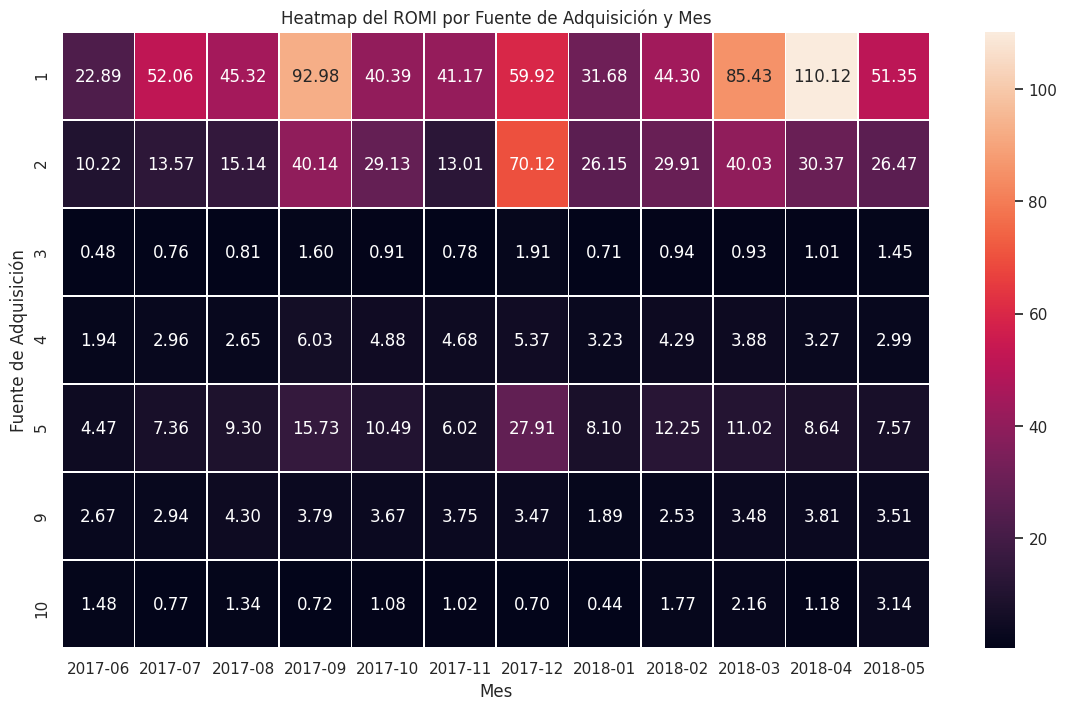

In [166]:
# Creamos el heatmap para el ROMI
plt.figure(figsize=(14, 8))
sns.heatmap(romi_pivot, annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap del ROMI por Fuente de Adquisición y Mes')
plt.xlabel('Mes')
plt.ylabel('Fuente de Adquisición')
plt.show()

Con respeto al retorno de inversión en marketing: 

1. Las fuentes con un ROMI más alto nos indican una alta rentabilidad de las inversiones en marketing, en nuestro caso del gráfico 'Retorno de Inversión de Marketing (ROMI) por adquisición' 

2. La fuente de adquisición 1 tiene los valores más altos de ROMI en los meses de junio a agosto del 2017, y nuevamente tenemos un ROMI alto en los meses de noviembre del 2017 y abril del 2018.

3. La fuente de adquisición 2 también muestra resultados altos del ROMI, en septiembre y diciembre del 2017 y marzo del 2018.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste!
</div>

### Trazo gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

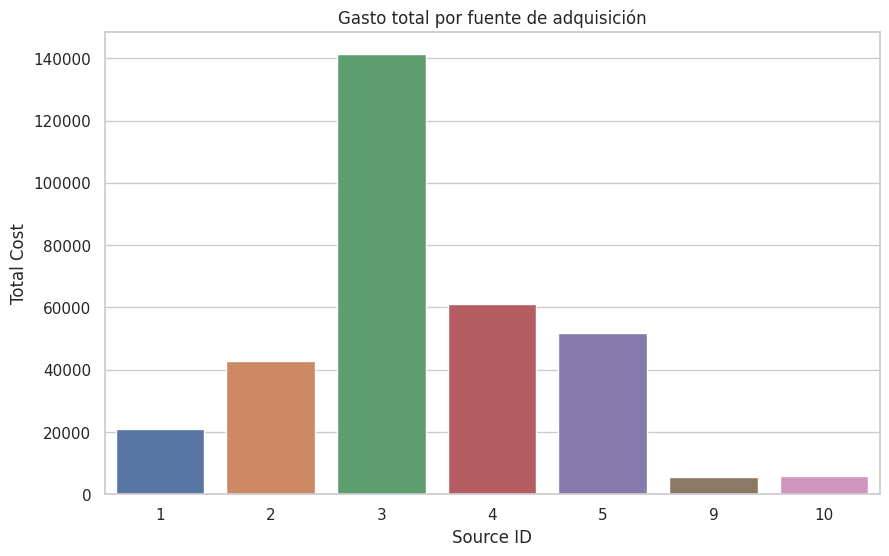

In [167]:
# Configuramos el estilo de gráficos seaborn
sns.set(style="whitegrid")

#Gráfico del gasto total por fuente de adquisición
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='total_cost', data=cost_per_source)
plt.title('Gasto total por fuente de adquisición')
plt.xlabel('Source ID')
plt.ylabel('Total Cost')
plt.show()

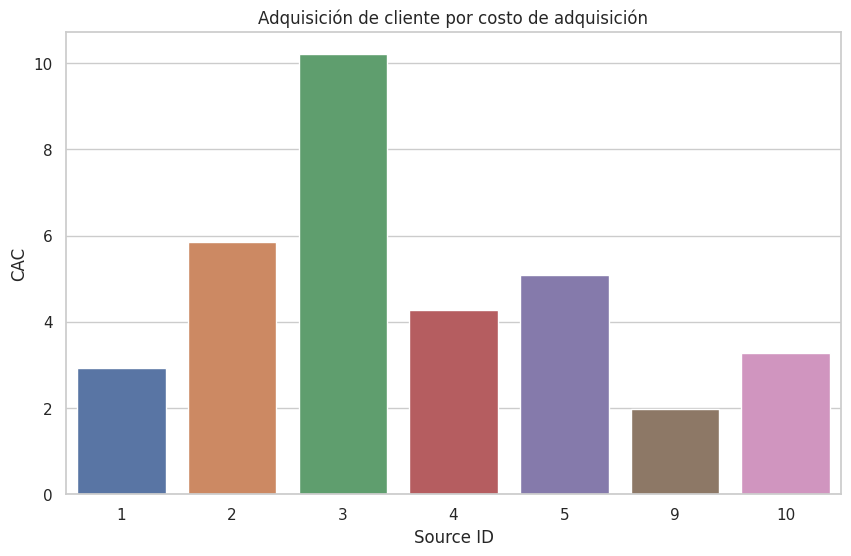

In [168]:
# Gráfico del CAC por fuente de adquisición
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='CAC', data=cac_per_source)
plt.title('Adquisición de cliente por costo de adquisición')
plt.xlabel('Source ID')
plt.ylabel('CAC')
plt.show()

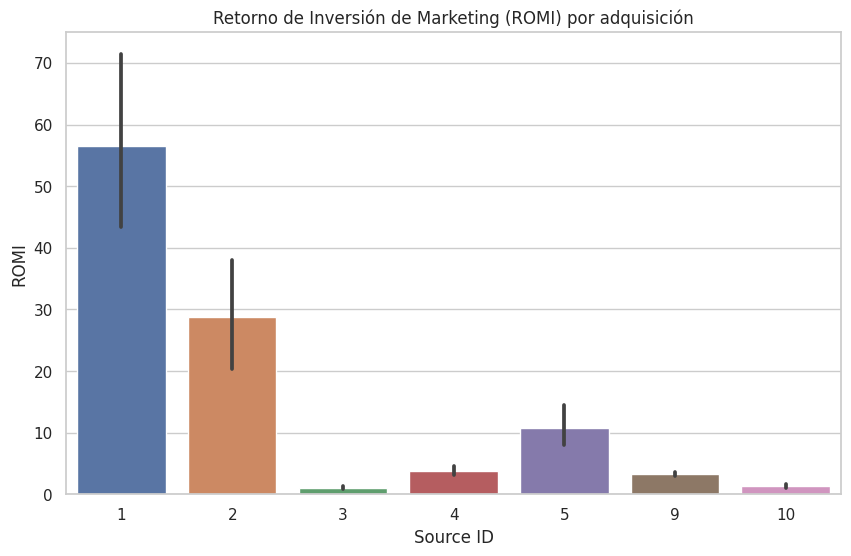

In [169]:
# Gráfico del ROMI por fuente de adquisición
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='ROMI', data=romi_per_source_month)
plt.title('Retorno de Inversión de Marketing (ROMI) por adquisición')
plt.xlabel('Source ID')
plt.ylabel('ROMI')
plt.show()

### Conclusiones

Después de analizar los datos de marketing y haber obtenido las métricas, se 
han obtenido las siguientes conlusiones y recomendaciones para los expertos de
marketing:

Costo total: Se tiene un costo total de $329131.62, esto nos da una visión general de la inversión de marketing en un año.

CAC: El costo de adquisicón de los clientes por cada fuente de adquisión nos revela en que plataformas se ha invertido más y el costo promedio de convertir a un usuario en cliente. Como nos muestra el gráfico 'Adquisición de cliente por costo de adquisición' la mayor inversión estuvo en el Source ID 3.

ROMI: Con respeto al retorno de inversión en marketing, las fuentes con un ROMI más alto nos indican una alta rentabilidad de las inversiones en marketing, en nuestro caso del gráfico 'Heatmap por ROMI y fuente de adquisición por mes' La fuente de adquisición 1 tiene los valores más altos de ROMI en los meses de junio a agosto del 2017, y nuevamente tenemos un ROMI alto en los meses de noviembre del 2017 y abril del 2018. La fuente de adquisición 2 también muestra resultados altos del ROMI, en septiembre y diciembre del 2017 y marzo del 2018.

La primera recomendación sería enfocarse en las adquisiciones CAC más bajo y el ROMI más alto, esto demuestra que sería mas eficaz ya que ha proporcionado una mayor cantida de clientes a menor costo.